 <h1><center>Text Analytics Project </center></h1>
 <h1><center>Memes Classification [Sarcasam,Hate,Category] </center></h1>

# Part- Exploratory Data Analysis

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Section_1"> Importing Required Libraries and Data</a></li>
        <li><a href="#Section_2"> Exploratory Data Analysis</a></li>
        <li><a href="#Section_3"> Distribution of Dataset Labels by category </a> </li>
        <li><a href="#Section_4"> Character Frequency plot </a> </li>
        <li><a href="#Section_4"> Word_Frequency plot </a> </li>
        <li><a href="#Section_4"> Average word length </a> </li>
        <li><a href="#Section_4"> Word Clouds by Class </a> </li>
        <li><a href="#Section_4"> TOP N-grams </a> </li>
     </ol>
</div>

## Importing Required Libraries and Data

In [25]:
##importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
from nltk import word_tokenize
from textstat import flesch_reading_ease
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
#!python -m spacy download en_core_web_sm,en_core_web_md,en_core_web_lg
import spacy
import en_core_web_sm,en_core_web_md,en_core_web_lg
nlp = en_core_web_lg.load()
#nlp = en_core_web_md.load()
#nlp = en_core_web_lg.load()
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import pyLDAvis
from pyLDAvis import gensim
from textblob import TextBlob
import gensim

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Exploratory Data Analysis

In [2]:
# df_train_test=pd.read_csv("C:/Users/saisu/Desktop/Memes-classification/Labels/Final_df.csv")#,encoding='utf8')
#revised cleaning
## importing cleaned text data
df_train_test=pd.read_csv("C:/Users/saisu/Desktop/Memes-classification/Labels/final_dataframe.csv")#,encoding='utf8')go

In [3]:
df_train_test.head(2)

,Unnamed: 0,Unnamed: 0.1,index,Image_id,Hate_label,FB_text,google_raw_text,label_list,object_list,Semi_cleaned_text,Sarcasm_label,Category
0,0,0,0,42953.png,0,its their character not their color that matters,its their character\nnọt their color\nthat mat...,"['Photo caption', 'Forehead', 'Internet meme',...","['Person', 'Person', 'Clothing']",its their character not their color that matters,0,3
1,1,1,1,13894.png,0,putting bows on your pet,putting bows on your pet\n,"['Cat', 'Small to medium-sized cats', 'Mammal'...","['Cat', 'Bowtie', 'Cat']",puts bowing for your petting,0,5


In [4]:
df_train_test.shape

(4451, 12)

## Categories

In [5]:
# Pie chart, 
def pie(sizes,labels,explode):  
    fig1,ax1 = plt.subplots()
    ax1.pie(sizes, explode  = explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.title('Number of Examples by  each Category')
    plt.show()

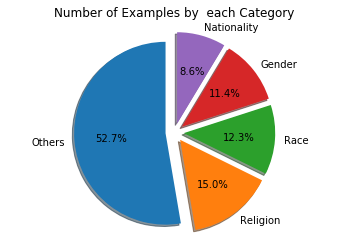

In [6]:
labels = df_train_test.Category.value_counts().index
#Int64Index([5, 3, 2, 1, 4], dtype='int64')
labels = ['Others','Religion','Race','Gender','Nationality']
sizes = df_train_test.Category.value_counts()
explode = (0.1, 0.1, 0.1, 0.1,0.1)# to explode  a pie chart with number of labels
pie(sizes,labels,explode)

### The Above Pie charts shows the disrtibution of dataset across categories. The datset is imbalanced across categories- Religious and Race had more compared to gender and nationality. Other memes were not categoried but we found the other memes had political,child,adult memes etc.

## Sarcasm/Non-Sarcasm 

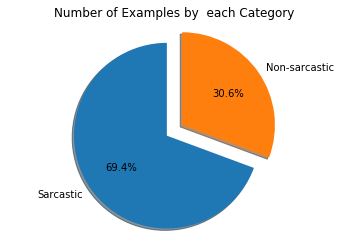

In [7]:
labels = df_train_test.Sarcasm_label.value_counts().index
#print(labels) Int64Index([1, 0], dtype='int64')
labels = ['Sarcastic', 'Non-sarcastic']
sizes = df_train_test.Sarcasm_label.value_counts()#.valuesg
explode = (0.1, 0.1)  
pie(sizes,labels,explode)

### The Above Pie charts shows the disrtibution of dataset across categories. The datset is imbalanced across categories- Sarcasm memes were more as compared to non-sarcatic

## Hate/Non-Hate

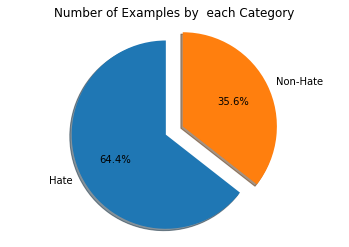

In [8]:
labels = df_train_test.Hate_label.value_counts().index
#print(labels) Int64Index([1, 0], dtype='int64')
labels = ['Hate', 'Non-Hate']
sizes = df_train_test.Hate_label.value_counts()#.valuesg
explode = (0.1, 0.1)  
pie(sizes,labels,explode)

### The Above Pie charts shows the disrtibution of dataset across categories. The datset is imbalanced across categories- Hate memes were more as compared to non-Hate

## Character Frequency plot

Text(0, 0.5, 'Frequency')

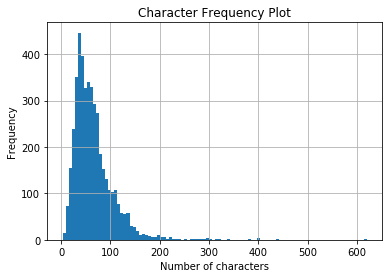

In [9]:
df_train_test['Semi_cleaned_text'].str.len().hist(bins=100)
plt.title('Character Frequency Plot')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')

### The Charcter frequency plot shows the disrtibution of number of charcters in each meme/document. Most of the memes contains charcters b/w 1 to 150 with most being on an average of 50. Which indicates the short text in each document 

## Word_Frequency plot

Text(0, 0.5, 'Frequency')

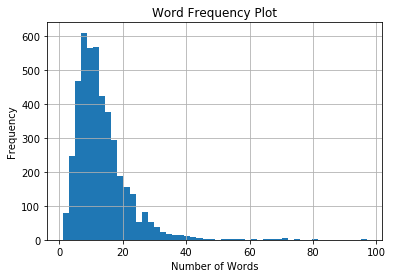

In [10]:
df_train_test['Semi_cleaned_text'].str.split().map(lambda x: len(x)).hist(bins=50)
plt.title('Word Frequency Plot')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

### The Word frequency plot shows the disrtibution of number of words in each meme/document. Most of the memes contains words b/w 1 to 20 with most being on an average of 10. Which indicates the short text in each document

## Average word length

Text(0, 0.5, 'Frequency')

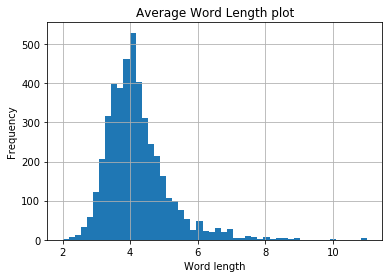

In [11]:
df_train_test['Semi_cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=50)
plt.title('Average Word Length plot')
plt.xlabel('Word length')
plt.ylabel('Frequency')

### TheAverage Word length plot shows the disrtibution of number of characters in each words in all meme/document. Most of the memes contains words of length b/w 1 to 6 with most being on an average of 4. Which indicates the short text and use of short words in each document

# Word Clouds by Class

In [12]:
#function to corpus creation for each category
def Word_Corpus(X):
    from nltk.tokenize import regexp_tokenize
    from nltk.corpus import stopwords
    Row_Corpus =''
    for i in X:
        Row_Corpus = Row_Corpus + ' ' + i
    Row_Corpus=Row_Corpus.strip().lower()
    Corpus_words=regexp_tokenize(Row_Corpus,r'[A-Za-z]+')
    Corpus_words = [w for w in Corpus_words if len(w)>1 and w not in stopwords.words('english')]
    return Corpus_words

In [13]:
#function to create wordclouds from corpus
def Word_cloud(in_col):
    Corpus_words=Word_Corpus(in_col)
    clean_list=''
    for word in Corpus_words:
        clean_list=clean_list + ' ' + word
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    wordcloud = WordCloud().generate(clean_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Hate Category

Non-Hate- 0


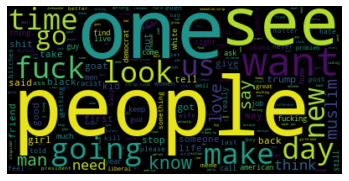

Hate- 1


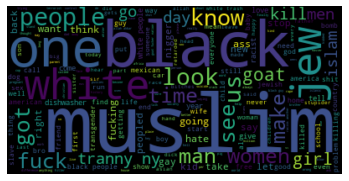

In [14]:
for i in df_train_test['Hate_label'].unique():
    df_input=df_train_test['Semi_cleaned_text'][df_train_test['Hate_label']==i]
    if i==0:
        print('Non-Hate-', i)
    else:
        print('Hate-', i)
    Word_cloud(df_input)

### From Above Word clouds we can see the difference in words being used in Hate/Non-Hate Memes. Hate Memes contains words related to race,religion etc.. where as non hate contained words which are frequently used in everyday english.

## Categories

Race 3


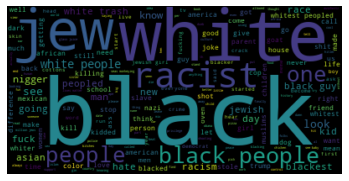

Others 5


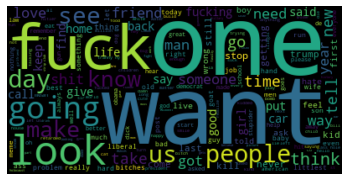

Gender 1


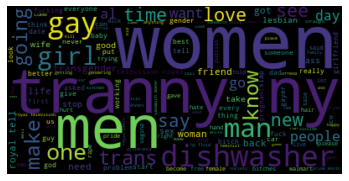

Religion- 2


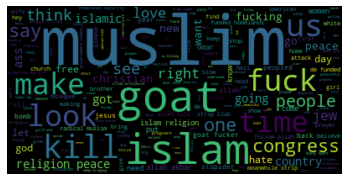

Nationality 4


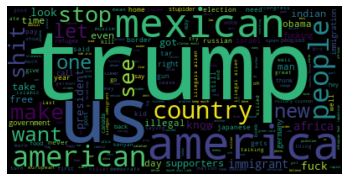

In [15]:
for i in df_train_test['Category'].unique():
    df_input=df_train_test['Semi_cleaned_text'][df_train_test['Category']==i]
    if i==1:
        print('Gender', i)
    elif i==2:
        print('Religion-', i)
    elif i==3:
        print('Race', i)
    elif i==4:
        print('Nationality', i)
    else:
        print('Others', i)
    Word_cloud(df_input)

### From Above Word clouds we can see the difference in words being used in each of the categories across memes. 

### Race Memes contains words related to racesuch as White,Black,Jews.

### Religious memes contains words such as Muslim,Goat,Islam,Christian etc. 

### Gender memes contains words Men,Women,Tranny etc..

### Nationality memes contains words such as trump,US,america, immigration, illegal etc.

## Sarcasam

Non-Sarcastic- 0


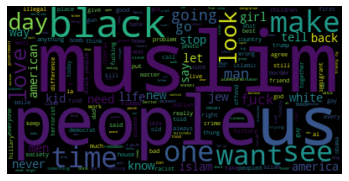

Sarcastic- 1


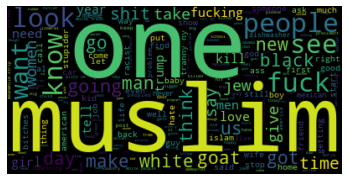

In [16]:
for i in df_train_test['Sarcasm_label'].unique():
    df_input=df_train_test['Semi_cleaned_text'][df_train_test['Sarcasm_label']==i]
    if i==0:
        print('Non-Sarcastic-', i)
    else:
        print('Sarcastic-', i)
    Word_cloud(df_input)

### From Above Word clouds we can see not quite difference in words being used in Sarcasm/Non-Sracasm  Memes. Both contans word related to Race,religion andnationality, detecting sarcasm would be very challenging due to this nature of memes.

## TOP N-grams

In [17]:
# top_n_trigram(df[df['companyname']==name]['cleanpros'])
stop = stopwords.words('english')
df_train_test['Semi_cleaned_text_ws']=df_train_test['Semi_cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# df_train_test['Semi_cleaned_text_ws']

In [18]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Bi-gram

Non-Sarcastic- 0


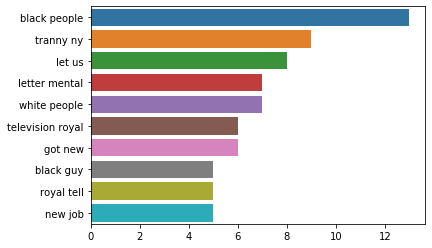

Sarcastic- 1


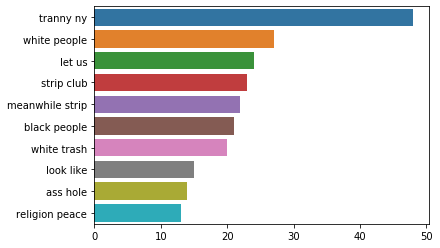

In [19]:

for i in df_train_test['Sarcasm_label'].unique():
    if i==0:
        print('Non-Sarcastic-', i)
    else:
        print('Sarcastic-', i)

    df_input=df_train_test['Semi_cleaned_text_ws'][df_train_test['Sarcasm_label']==i]
    top_n_bigrams=get_top_ngram(df_input,2)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.show()

Race 3


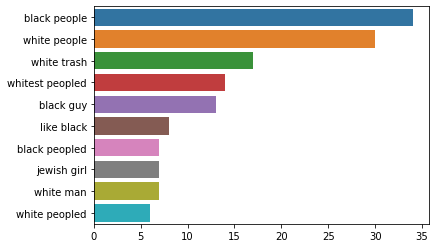

Others 5


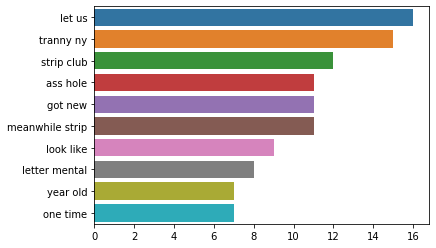

Gender 1


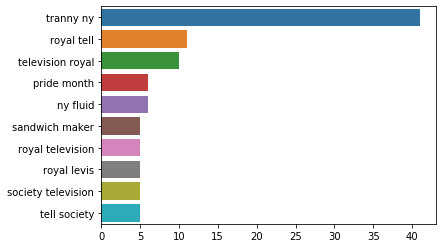

Religion- 2


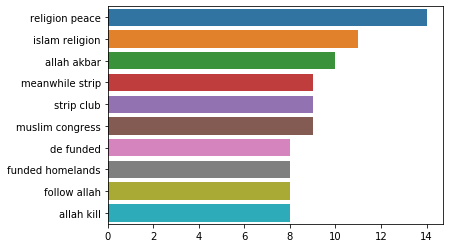

Nationality 4


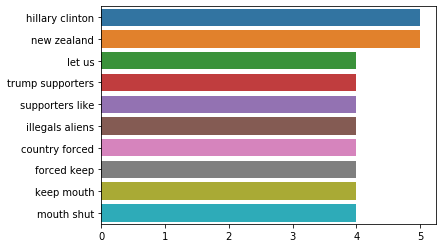

In [20]:
for i in df_train_test['Category'].unique():
    if i==1:
        print('Gender', i)
    elif i==2:
        print('Religion-', i)
    elif i==3:
        print('Race', i)
    elif i==4:
        print('Nationality', i)
    else:
        print('Others', i)
    df_input=df_train_test['Semi_cleaned_text_ws'][df_train_test['Category']==i]
    top_n_bigrams=get_top_ngram(df_input,2)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.show()

Non-Hate- 0


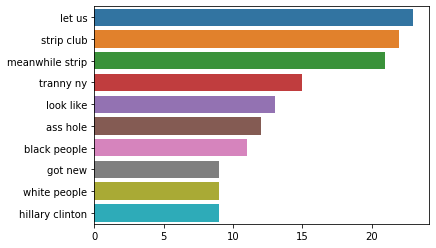

Hate- 1


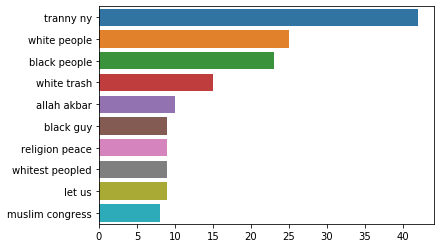

In [21]:
for i in df_train_test['Hate_label'].unique():
    if i==0:
        print('Non-Hate-', i)
    else:
        print('Hate-', i)
    df_input=df_train_test['Semi_cleaned_text_ws'][df_train_test['Hate_label']==i]
    top_n_bigrams=get_top_ngram(df_input,2)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.show()

## Tri-gram

Non-Sarcastic- 0


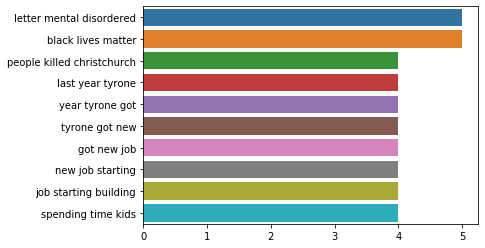

Sarcastic- 1


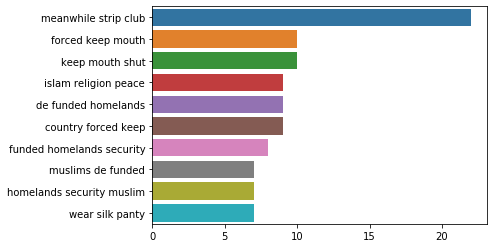

In [22]:
for i in df_train_test['Sarcasm_label'].unique():
    if i==0:
        print('Non-Sarcastic-', i)
    else:
        print('Sarcastic-', i)

    df_input=df_train_test['Semi_cleaned_text_ws'][df_train_test['Sarcasm_label']==i]
    top_n_bigrams=get_top_ngram(df_input,3)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.show()

Race 3


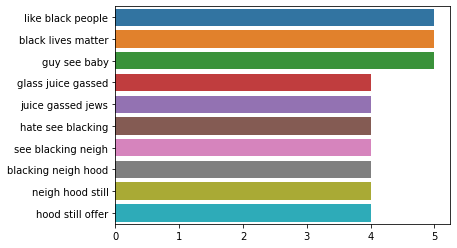

Others 5


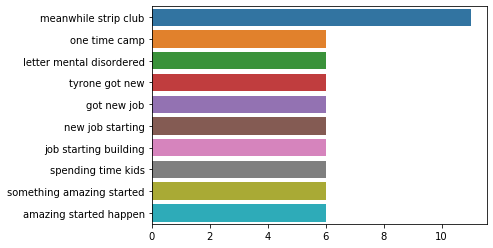

Gender 1


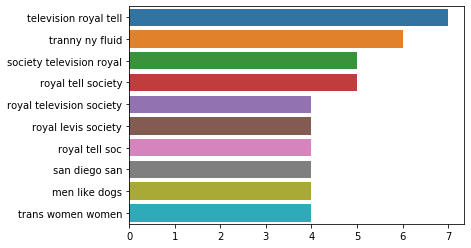

Religion- 2


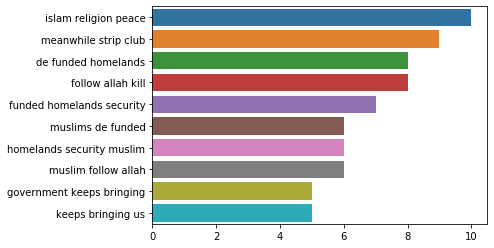

Nationality 4


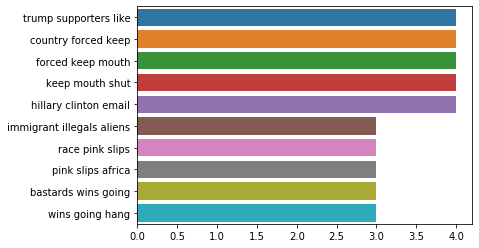

In [23]:
for i in df_train_test['Category'].unique():
    if i==1:
        print('Gender', i)
    elif i==2:
        print('Religion-', i)
    elif i==3:
        print('Race', i)
    elif i==4:
        print('Nationality', i)
    else:
        print('Others', i)
    df_input=df_train_test['Semi_cleaned_text_ws'][df_train_test['Category']==i]
    top_n_bigrams=get_top_ngram(df_input,3)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.show()

### From Above Bi-grams and tri-grams we can see quite large difference in words being used in Sarcasm/Non-Sarcasm Memes, Hate/Non-Hate memes and also across categories. Moreover, the words used in Trigrams are more effective and relevant to bi-grams, we expect to use tri-grams and then bi-grams to detect and filter memes in building models. so that models will be more robust to detect categories.

# Topic Modeling with LDA

In [26]:
#Custom_stopwords=['one','like','give','know','get','let',]
def preprocess_news(df_col):
    corpus=[]
    lem=WordNetLemmatizer()
    for text in df_col:
        words = regexp_tokenize(text.lower(), r'[A-Za-z]+')
        words = [w for w in words if len(w)>1 and w not in stopwords.words('english')]
#         words = [w for w in words if (w not in Custom_stopwords)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        tags = nltk.pos_tag(words)
        dt_tags = [t for t in tags if(t[1] == ("NN") or t[1] == ("NNP") or t[1] == ("NNS") or t[1] == ("NNPS"))]
        if len(dt_tags)>0:    
            a,b=zip(*dt_tags)
        words_new=list(a)
        corpus.append(words_new)
    return corpus
df_input=df_train_test['Semi_cleaned_text']#[df_train_test['Sarcasm_label']==1]
corpus=preprocess_news(df_input)
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [27]:
# # Determining optimum number of topics using coherence values 
# def maxCoherence(corpus, isLsi,my_dict,token):
#     coherence_values = []
#     model_list = []
#     min_topics, max_topics, step = 1, 10, 1
#     for i in range(min_topics, max_topics, step):
#         if (isLsi) :
#             model = LsiModel(corpus, id2word=my_dict, num_topics=i)
#         else:
#             model = LdaModel(corpus, id2word=my_dict, num_topics=i)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=token, dictionary=my_dict, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
#     return coherence_values.index(max(coherence_values))

In [28]:
# lda_model = LdaModel(corpus=tfidf, id2word=my_dict, num_topics=maxCoherence(tfidf,isLsi=False,my_dict = my_dict,token = token))

In [29]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4,#maxCoherence(tfidf,isLsi=False,my_dict = dic,token = token), 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 8)
lda_model.show_topics()

[(0,
  '0.014*"friend" + 0.012*"girl" + 0.009*"fuck" + 0.009*"islam" + 0.008*"car" + 0.007*"need" + 0.007*"strip" + 0.007*"part" + 0.006*"news" + 0.006*"hand"'),
 (1,
  '0.028*"muslim" + 0.019*"day" + 0.019*"time" + 0.018*"look" + 0.013*"people" + 0.009*"problem" + 0.007*"racist" + 0.007*"peace" + 0.006*"woman" + 0.006*"religion"'),
 (2,
  '0.030*"people" + 0.010*"child" + 0.009*"kid" + 0.008*"tranny" + 0.008*"life" + 0.006*"everyone" + 0.005*"fucker" + 0.005*"race" + 0.005*"society" + 0.005*"jew"'),
 (3,
  '0.019*"man" + 0.013*"woman" + 0.010*"home" + 0.009*"men" + 0.009*"country" + 0.009*"trump" + 0.008*"way" + 0.008*"bitch" + 0.008*"goat" + 0.007*"guy"')]

### We tried to build Topic modeling just to check the the most topics talked about in the memes, we found dividing the corpus into 4 topics would be more appropriate by max coherene graph.
### Also the topic 1 uses general words
### Also the topic 2 uses religion related words
### Also the topic 3 uses race related words
### Also the topic 4 uses gender related words

### these were mostly aligned with the categoristion of memes while labeling.

In [30]:
#visuallisng tiopics
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, bow_corpus, dic)
pyLDAvis.show(vis)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [07/Nov/2020 19:20:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 19:20:57] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 19:20:57] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 19:20:57] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Nov/2020 19:20:57] code 404, message Not Found
127.0.0.1 - - [07/Nov/2020 19:20:57] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


# Parts of Speech

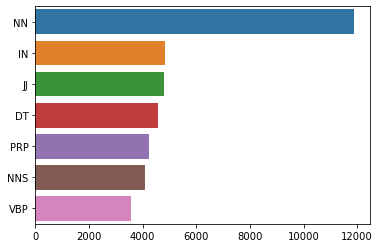

In [31]:
#pos detection
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos
tags=df_train_test['Semi_cleaned_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

### Nouns are used mostly in the memes

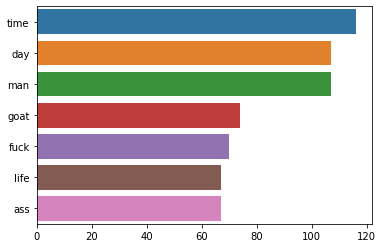

In [32]:
def get_POS(text,POS):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag==POS :
            adj.append(word)
    return adj
words=df_train_test['Semi_cleaned_text'].apply(lambda x : get_POS(x,'NN'))
words=[x for l in words for x in l]
words=[w for w in words if len(w)>1 and w not in stopwords.words('english')]

counter=Counter(words)
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

### most used nouns and verbs. - we didn't remove mostly used stopwords, removing those might have helped good visualisations

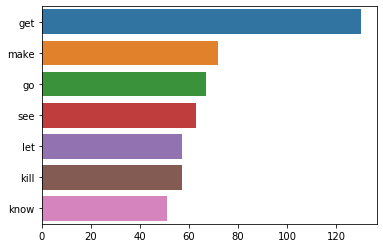

In [33]:
words=df_train_test['Semi_cleaned_text'].apply(lambda x : get_POS(x,'VB'))
words=[x for l in words for x in l]
words=[w for w in words if len(w)>1 and w not in stopwords.words('english')]

counter=Counter(words)
x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

## Meme Readabiity

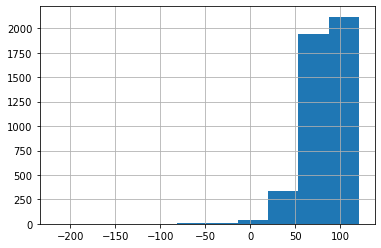

In [34]:
#https://github.com/shivam5992/textstat
df_train_test['Semi_cleaned_text'].apply(lambda x : flesch_reading_ease(x)).hist()

### We found some documentaion regarding text readbility- we tried to see if the memes were easily readble and understandable, this result was not quite satisfactory.  

# Sentiment Analysis

### Though not required. We applied sentiment analysis to check if the exesting sentiment analysers in Textblob and NLKT vader were able to detect the sentiment as labeled. they both failed to explain the memes. 

# Text Blob

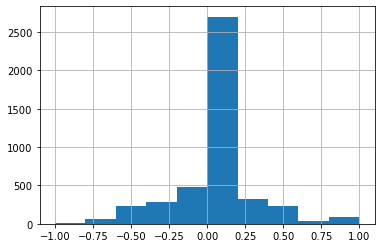

In [35]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df_train_test['polarity_score_TB']=df_train_test['Semi_cleaned_text'].apply(lambda x : polarity(x))
df_train_test['polarity_score_TB'].hist()

<BarContainer object of 3 artists>

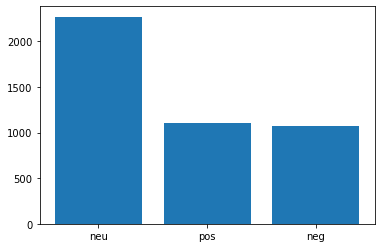

In [36]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df_train_test['polarity_TB']=df_train_test['polarity_score_TB'].apply(lambda x : sentiment(x))
plt.bar(df_train_test.polarity_TB.value_counts().index,
df_train_test.polarity_TB.value_counts())

# Vader

<BarContainer object of 3 artists>

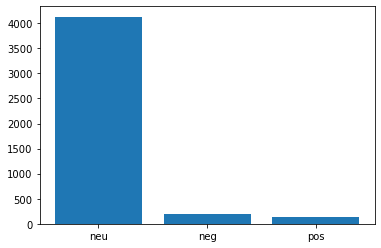

In [37]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])
df_train_test['polarity_VA']=df_train_test['Semi_cleaned_text'].map(lambda x: get_vader_score(x))
polarity=df_train_test['polarity_VA'].replace({0:'neg',1:'neu',2:'pos'})
plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# Named Entity Recognition

### We applied spacy libraries exesting NER models on our to Corpus to check what are the most entities talked about in the memes.
### Memes were mostly disussed on persons,religious,race followed by existing organisation and places

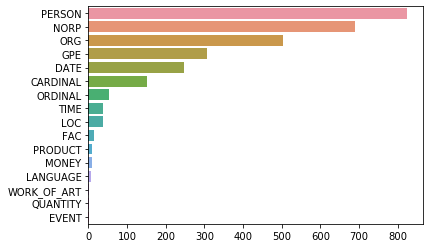

In [38]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]
ent=df_train_test['Semi_cleaned_text'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=Counter(ent)
count=counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

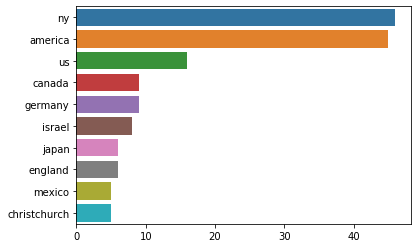

In [39]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=df_train_test['Semi_cleaned_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

### In places the most talked places are NY, america, US, Canada,Germany,Israel etc..

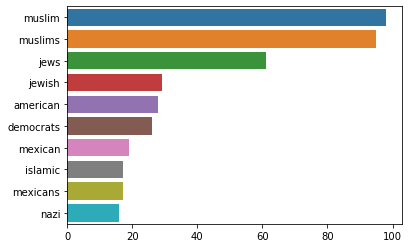

In [40]:
per=df_train_test['Semi_cleaned_text'].apply(lambda x: ner(x,"NORP"))
per=[i for x in per for i in x]
counter=Counter(per)
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

### In NORP entities the most talked are Muslim,jews americans,democrats etcc.

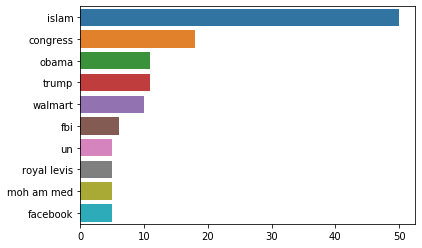

In [41]:
per=df_train_test['Semi_cleaned_text'].apply(lambda x: ner(x,"ORG"))
per=[i for x in per for i in x]
counter=Counter(per)
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

### In ORG entities the most talked are islam,congress,walmart facebook,fbi etc..

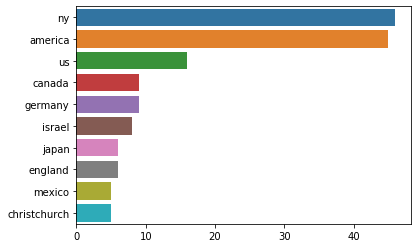

In [42]:
per=df_train_test['Semi_cleaned_text'].apply(lambda x: ner(x,"GPE"))
per=[i for x in per for i in x]
counter=Counter(per)
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

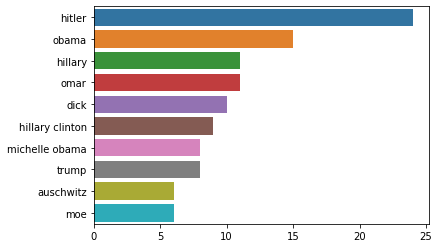

In [43]:
per=df_train_test['Semi_cleaned_text'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

### In Person entities the most talked are Hitler,obama,hilary, omar clinton etc.

## Word Associations and word embeddings¶

In [44]:
lemmatizer = WordNetLemmatizer()
cleaned_docs = []
for doc in df_train_test['Semi_cleaned_text']:
    words = regexp_tokenize(doc.lower(), r'[A-Za-z]+')
    words = [w for w in words if len(w)>2 and w not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(w) for w in words]
    cleaned_docs.append(words)
cleaned_docs

model = Word2Vec(cleaned_docs, size=100, window=8, min_count=2, sample=1e-3, sg=1, iter=5, workers=8)
vocab = set(model.wv.index2word)

In [45]:
model.wv.similar_by_word('woman')

[('trans', 0.9994431734085083),
 ('men', 0.9989833831787109),
 ('right', 0.9989821910858154),
 ('nothing', 0.9989744424819946),
 ('place', 0.9989567995071411),
 ('life', 0.9989333152770996),
 ('like', 0.9989281892776489),
 ('man', 0.9989266991615295),
 ('well', 0.9989233613014221),
 ('ask', 0.9989221096038818)]

In [46]:
model.wv.similar_by_word('muslim')

[('radical', 0.9994349479675293),
 ('allah', 0.9993698000907898),
 ('follow', 0.9993234872817993),
 ('kill', 0.9992811679840088),
 ('moderate', 0.9991598129272461),
 ('difference', 0.9991475343704224),
 ('akbar', 0.999121367931366),
 ('fuck', 0.9991207122802734),
 ('terrorist', 0.9990785121917725),
 ('congress', 0.9990719556808472)]

### We tried to see the most assocaiated words in corpus with most frequent words by fitting corpus to pre-built corpus Googles word2Vec model. Above were the results

## Thank You

### Next to modelling